In [1]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow
import glob

%matplotlib inline

In [143]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## find a month worth of profiles from a spot, average them in space, time, get std devs

## do the same for the PI case

## plot them


    jan 1 - jan 31
    march 1 - march 31
    july 1-july 31

In [145]:
jan_DIC_BR_stor = np.zeros([len(arrow_array),40,898,398])
jan_DIC_PI_stor = np.zeros([len(arrow_array),40,898,398])
mar_DIC_BR_stor = np.zeros([len(arrow_array),40,898,398])
mar_DIC_PI_stor = np.zeros([len(arrow_array),40,898,398])
jul_DIC_BR_stor = np.zeros([len(arrow_array),40,898,398])
jul_DIC_PI_stor = np.zeros([len(arrow_array),40,898,398])
jan_TA_BR_stor = np.zeros([len(arrow_array),40,898,398])
jan_TA_PI_stor = np.zeros([len(arrow_array),40,898,398])
mar_TA_BR_stor = np.zeros([len(arrow_array),40,898,398])
mar_TA_PI_stor = np.zeros([len(arrow_array),40,898,398])
jul_TA_BR_stor = np.zeros([len(arrow_array),40,898,398])
jul_TA_PI_stor = np.zeros([len(arrow_array),40,898,398])
jan_temp_BR_stor = np.zeros([len(arrow_array),40,898,398])
jan_temp_PI_stor = np.zeros([len(arrow_array),40,898,398])
mar_temp_BR_stor = np.zeros([len(arrow_array),40,898,398])
mar_temp_PI_stor = np.zeros([len(arrow_array),40,898,398])
jul_temp_BR_stor = np.zeros([len(arrow_array),40,898,398])
jul_temp_PI_stor = np.zeros([len(arrow_array),40,898,398])
jan_sal_BR_stor = np.zeros([len(arrow_array),40,898,398])
jan_sal_PI_stor = np.zeros([len(arrow_array),40,898,398])
mar_sal_BR_stor = np.zeros([len(arrow_array),40,898,398])
mar_sal_PI_stor = np.zeros([len(arrow_array),40,898,398])
jul_sal_BR_stor = np.zeros([len(arrow_array),40,898,398])
jul_sal_PI_stor = np.zeros([len(arrow_array),40,898,398])


In [154]:
start = '2015-01-01'
end = '2015-01-31'
start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

for i in range(0,len(arrow_array)):
    run_date = arrow_array[i][0]    
    ddmmmyy = run_date.format('DDMMMYY').lower()
    humandate = run_date.format('MMM DD, YYYY')
    yyyymmdd = run_date.format('YYYYMMDD')
    if(i%5==0):
        print('ANALYZING ANALYZING ',humandate)

    #change this if you need to change strings

    carp1 = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/SKOG_1d_*_carp_T_{yyyymmdd}-{yyyymmdd}.nc'
    grid1 = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/SKOG_1d_*_grid_T_{yyyymmdd}-{yyyymmdd}.nc'
    w2 = glob.glob(carp1)
    w3 = w2[0]
    w = nc.Dataset(w3)
    DIC_BR = w['dissolved_inorganic_carbon'][:]
    TA_BR=w['total_alkalinity'][:]
    jan_DIC_BR_stor[i,:,:,:] = DIC_BR
    jan_TA_BR_stor[i,:,:,:] = TA_BR
    w4 = glob.glob(grid1)
    w5 = w4[0]
    w6 = nc.Dataset(w5)
    temp_BR = w6['votemper'][0,:,:,:]
    sal_BR = w6['vosaline'][:]
    jan_temp_BR_stor[i,:,:,:] = temp_BR
    jan_sal_BR_stor[i,:,:,:] = sal_BR

    carp1 = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_*_carp_T_{yyyymmdd}-{yyyymmdd}.nc'
    grid1 = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_*_grid_T_{yyyymmdd}-{yyyymmdd}.nc'
    w2 = glob.glob(carp1)
    w3 = w2[0]
    w = nc.Dataset(w3)
    DIC_PI = w['dissolved_inorganic_carbon'][:]
    TA_PI=w['total_alkalinity'][:]
    jan_DIC_PI_stor[i,:,:,:] = DIC_PI
    jan_TA_PI_stor[i,:,:,:] = TA_PI
    w4 = glob.glob(grid1)
    w5 = w4[0]
    w6 = nc.Dataset(w5)
    temp_PI = w6['votemper'][:]
    sal_PI = w6['vosaline'][:]
    jan_temp_PI_stor[i,:,:,:] = temp_PI
    jan_sal_PI_stor[i,:,:,:] = sal_PI   

    
start = '2015-03-01'
end = '2015-03-31'
start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

for i in range(0,len(arrow_array)):
    run_date = arrow_array[i][0]    
    ddmmmyy = run_date.format('DDMMMYY').lower()
    humandate = run_date.format('MMM DD, YYYY')
    yyyymmdd = run_date.format('YYYYMMDD')
    if(i%5==0):
        print('ANALYZING ANALYZING ',humandate)

    #change this if you need to change strings

    carp1 = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/SKOG_1d_*_carp_T_{yyyymmdd}-{yyyymmdd}.nc'
    grid1 = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/SKOG_1d_*_grid_T_{yyyymmdd}-{yyyymmdd}.nc'
    w2 = glob.glob(carp1)
    w3 = w2[0]
    w = nc.Dataset(w3)
    DIC_BR = w['dissolved_inorganic_carbon'][:]
    TA_BR=w['total_alkalinity'][:]
    mar_DIC_BR_stor[i,:,:,:] = DIC_BR
    mar_TA_BR_stor[i,:,:,:] = TA_BR
    w4 = glob.glob(grid1)
    w5 = w4[0]
    w6 = nc.Dataset(w5)
    temp_BR = w6['votemper'][0,:,:,:]
    sal_BR = w6['vosaline'][:]
    mar_temp_BR_stor[i,:,:,:] = temp_BR
    mar_sal_BR_stor[i,:,:,:] = sal_BR

    carp1 = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_*_carp_T_{yyyymmdd}-{yyyymmdd}.nc'
    grid1 = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_*_grid_T_{yyyymmdd}-{yyyymmdd}.nc'
    w2 = glob.glob(carp1)
    w3 = w2[0]
    w = nc.Dataset(w3)
    DIC_PI = w['dissolved_inorganic_carbon'][:]
    TA_PI=w['total_alkalinity'][:]
    mar_DIC_PI_stor[i,:,:,:] = DIC_PI
    mar_TA_PI_stor[i,:,:,:] = TA_PI
    w4 = glob.glob(grid1)
    w5 = w4[0]
    w6 = nc.Dataset(w5)
    temp_PI = w6['votemper'][:]
    sal_PI = w6['vosaline'][:]
    mar_temp_PI_stor[i,:,:,:] = temp_PI
    mar_sal_PI_stor[i,:,:,:] = sal_PI    

start = '2015-07-01'
end = '2015-07-31'
start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
for i in range(0,len(arrow_array)):
    run_date = arrow_array[i][0]    
    ddmmmyy = run_date.format('DDMMMYY').lower()
    humandate = run_date.format('MMM DD, YYYY')
    yyyymmdd = run_date.format('YYYYMMDD')
    if(i%5==0):
        print('ANALYZING ANALYZING ',humandate)

    #change this if you need to change strings

    carp1 = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/SKOG_1d_*_carp_T_{yyyymmdd}-{yyyymmdd}.nc'
    grid1 = f'/data/tjarniko/results/BASERUN_EXP/BR_2nd_2015/ncs/SKOG_1d_*_grid_T_{yyyymmdd}-{yyyymmdd}.nc'
    w2 = glob.glob(carp1)
    w3 = w2[0]
    w = nc.Dataset(w3)
    DIC_BR = w['dissolved_inorganic_carbon'][:]
    TA_BR=w['total_alkalinity'][:]
    jul_DIC_BR_stor[i,:,:,:] = DIC_BR
    jul_TA_BR_stor[i,:,:,:] = TA_BR
    w4 = glob.glob(grid1)
    w5 = w4[0]
    w6 = nc.Dataset(w5)
    temp_BR = w6['votemper'][0,:,:,:]
    sal_BR = w6['vosaline'][:]
    jul_temp_BR_stor[i,:,:,:] = temp_BR
    jul_sal_BR_stor[i,:,:,:] = sal_BR

    carp1 = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_*_carp_T_{yyyymmdd}-{yyyymmdd}.nc'
    grid1 = f'/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_*_grid_T_{yyyymmdd}-{yyyymmdd}.nc'
    w2 = glob.glob(carp1)
    w3 = w2[0]
    w = nc.Dataset(w3)
    DIC_PI = w['dissolved_inorganic_carbon'][:]
    TA_PI=w['total_alkalinity'][:]
    jul_DIC_PI_stor[i,:,:,:] = DIC_PI
    jul_TA_PI_stor[i,:,:,:] = TA_PI
    w4 = glob.glob(grid1)
    w5 = w4[0]
    w6 = nc.Dataset(w5)
    temp_PI = w6['votemper'][:]
    sal_PI = w6['vosaline'][:]
    jul_temp_PI_stor[i,:,:,:] = temp_PI
    jul_sal_PI_stor[i,:,:,:] = sal_PI


ANALYZING ANALYZING  Jan 01, 2015
ANALYZING ANALYZING  Jan 06, 2015
ANALYZING ANALYZING  Jan 11, 2015
ANALYZING ANALYZING  Jan 16, 2015
ANALYZING ANALYZING  Jan 21, 2015
ANALYZING ANALYZING  Jan 26, 2015
ANALYZING ANALYZING  Jan 31, 2015
ANALYZING ANALYZING  Mar 01, 2015
ANALYZING ANALYZING  Mar 06, 2015
ANALYZING ANALYZING  Mar 11, 2015
ANALYZING ANALYZING  Mar 16, 2015
ANALYZING ANALYZING  Mar 21, 2015
ANALYZING ANALYZING  Mar 26, 2015
ANALYZING ANALYZING  Mar 31, 2015
ANALYZING ANALYZING  Jul 01, 2015
ANALYZING ANALYZING  Jul 06, 2015
ANALYZING ANALYZING  Jul 11, 2015
ANALYZING ANALYZING  Jul 16, 2015
ANALYZING ANALYZING  Jul 21, 2015
ANALYZING ANALYZING  Jul 26, 2015
ANALYZING ANALYZING  Jul 31, 2015


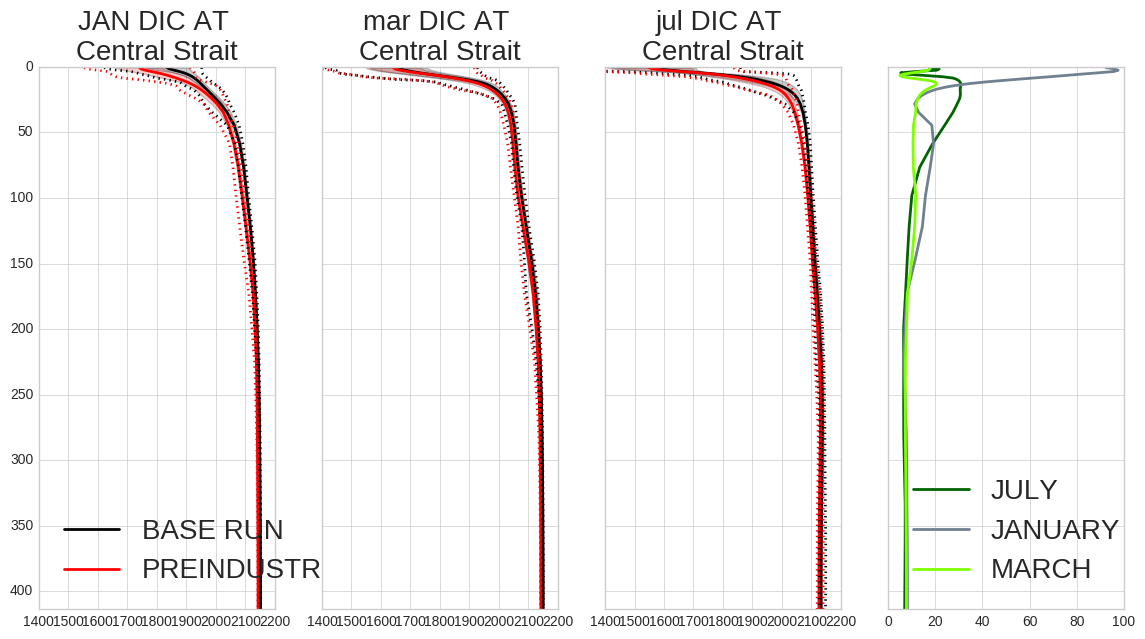

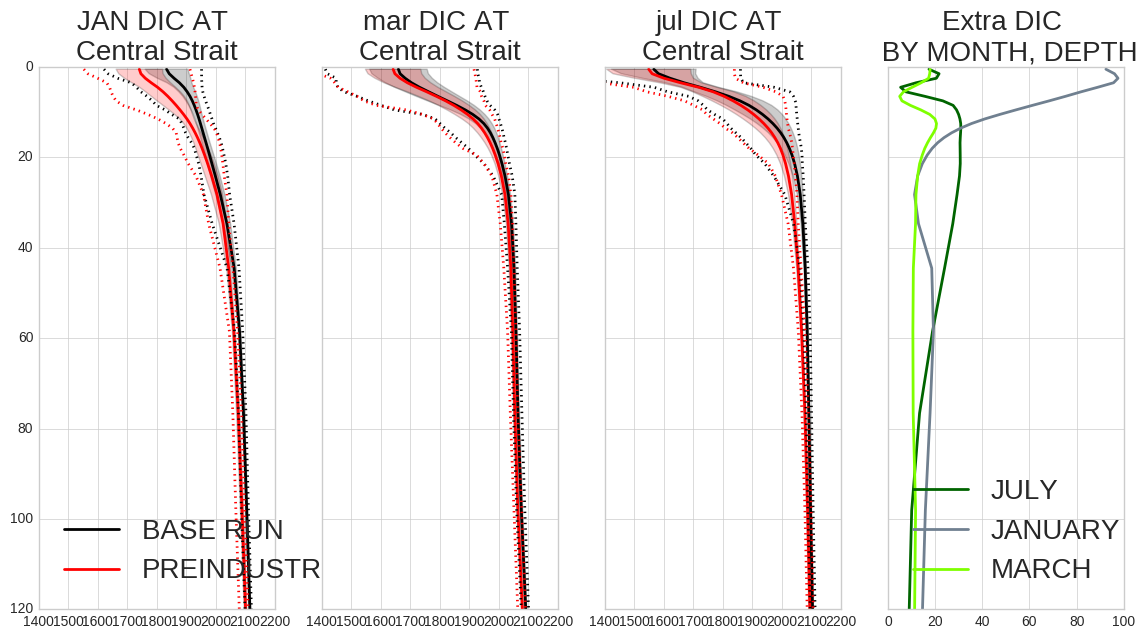

In [156]:
jan_DIC_BR_stor jan_DIC_PI_stor mar_DIC_BR_stor mar_DIC_PI_stor jul_DIC_BR_stor jul_DIC_PI_stor jan_TA_BR_stor jan_TA_PI_stor mar_TA_BR_stor mar_TA_PI_stor jul_TA_BR_stor jul_TA_PI_stor jan_temp_BR_stor jan_temp_PI_stor mar_temp_BR_stor mar_temp_PI_stor jul_temp_BR_stor jul_temp_PI_stor jan_sal_BR_stor jan_sal_PI_stor mar_sal_BR_stor mar_sal_PI_stor jul_sal_BR_stor jul_sal_PI_stor 

In [7]:
ttera_is = -1
tsra_psu = 31
ttara = 2100 * 1e-3
tdra = 2000 * 1e-3
tzero = 0
tpressure = 0
tdepth = 0 
response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                   sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print(pH)
print(pco2)

[8.05586132]
[341.83991455]


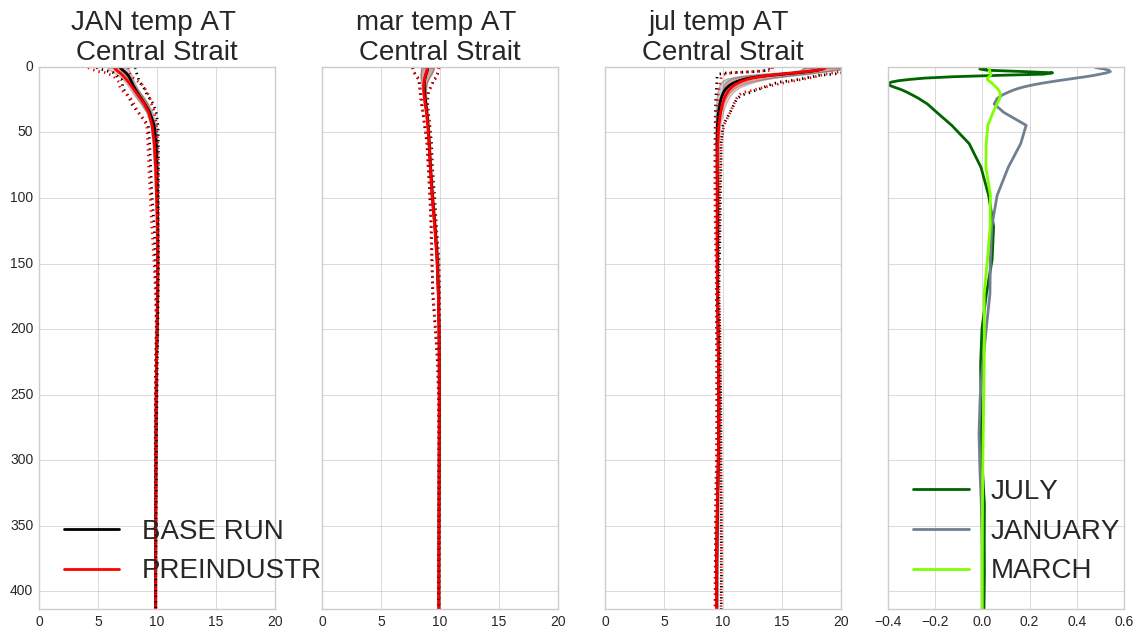

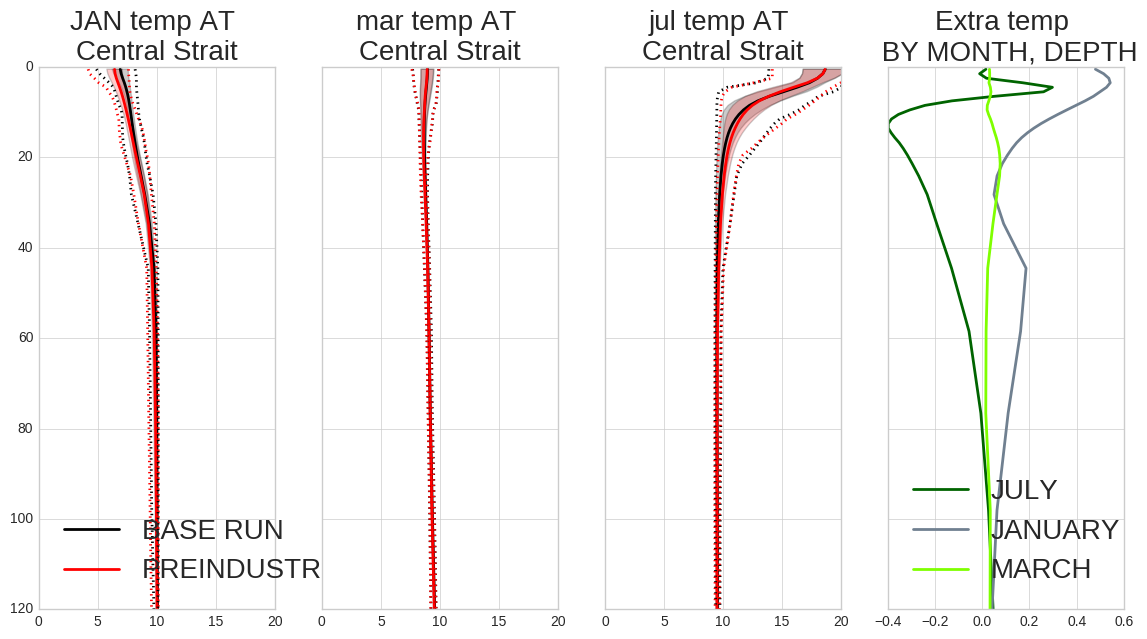

In [159]:
tstn = 'CS'
prof_depth = w.variables['deptht'][:]
xmin = 1400
xmax = 2200
ymin = 0
ymax = 414

xmin2 = 1400
xmax2 = 2200
ymin2 = 0
ymax2 = 120

jan_t_stn_DIC_BR = jan_DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jan_t_stn_DIC_PI = jan_DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_DIC_BR = mar_DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_DIC_PI = mar_DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_DIC_BR = jul_DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_DIC_PI = jul_DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

jan_t_stn_DIC_BR_mean = np.zeros(40)
jan_t_stn_DIC_PI_mean = np.zeros(40)
jan_t_stn_DIC_BR_std = np.zeros(40)
jan_t_stn_DIC_PI_std = np.zeros(40)
jan_t_stn_DIC_BR_max = np.zeros(40)
jan_t_stn_DIC_PI_max = np.zeros(40)
jan_t_stn_DIC_BR_min = np.zeros(40)
jan_t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jan_t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(jan_t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jan_t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    jan_t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    jan_t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    jan_t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    jan_t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    jan_t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    jan_t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    jan_t_stn_DIC_PI_min[i] = np.nanmin(t_PI)
    
mar_t_stn_DIC_BR_mean = np.zeros(40)
mar_t_stn_DIC_PI_mean = np.zeros(40)
mar_t_stn_DIC_BR_std = np.zeros(40)
mar_t_stn_DIC_PI_std = np.zeros(40)
mar_t_stn_DIC_BR_max = np.zeros(40)
mar_t_stn_DIC_PI_max = np.zeros(40)
mar_t_stn_DIC_BR_min = np.zeros(40)
mar_t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(mar_t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(mar_t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    mar_t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    mar_t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    mar_t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    mar_t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    mar_t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    mar_t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    mar_t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    mar_t_stn_DIC_PI_min[i] = np.nanmin(t_PI)
    
jul_t_stn_DIC_BR_mean = np.zeros(40)
jul_t_stn_DIC_PI_mean = np.zeros(40)
jul_t_stn_DIC_BR_std = np.zeros(40)
jul_t_stn_DIC_PI_std = np.zeros(40)
jul_t_stn_DIC_BR_max = np.zeros(40)
jul_t_stn_DIC_PI_max = np.zeros(40)
jul_t_stn_DIC_BR_min = np.zeros(40)
jul_t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jul_t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(jul_t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jul_t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    jul_t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    jul_t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    jul_t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    jul_t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    jul_t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    jul_t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    jul_t_stn_DIC_PI_min[i] = np.nanmin(t_PI)
    

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_DIC_BR_mean-jan_t_stn_DIC_BR_std,jan_t_stn_DIC_BR_mean+jan_t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_DIC_PI_mean-jan_t_stn_DIC_PI_std,jan_t_stn_DIC_PI_mean+jan_t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('JAN DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_DIC_BR_mean-mar_t_stn_DIC_BR_std,mar_t_stn_DIC_BR_mean+mar_t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_DIC_PI_mean-mar_t_stn_DIC_PI_std,mar_t_stn_DIC_PI_mean+mar_t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('mar DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_DIC_BR_mean-jul_t_stn_DIC_BR_std,jul_t_stn_DIC_BR_mean+jul_t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_DIC_PI_mean-jul_t_stn_DIC_PI_std,jul_t_stn_DIC_PI_mean+jul_t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('jul DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_DIC_BR_mean-jul_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_DIC_BR_mean-jan_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_DIC_BR_mean-mar_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')

## shallow plot

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_DIC_BR_mean-jan_t_stn_DIC_BR_std,jan_t_stn_DIC_BR_mean+jan_t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_DIC_PI_mean-jan_t_stn_DIC_PI_std,jan_t_stn_DIC_PI_mean+jan_t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin2,xmax2])
ax.set_ylim([ymax2,ymin2])
ax.set_title('JAN DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_DIC_BR_mean-mar_t_stn_DIC_BR_std,mar_t_stn_DIC_BR_mean+mar_t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_DIC_PI_mean-mar_t_stn_DIC_PI_std,mar_t_stn_DIC_PI_mean+mar_t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin2,xmax2])
ax2.set_ylim([ymax2,ymin2])
ax2.set_title('mar DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_DIC_BR_mean-jul_t_stn_DIC_BR_std,jul_t_stn_DIC_BR_mean+jul_t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_DIC_PI_mean-jul_t_stn_DIC_PI_std,jul_t_stn_DIC_PI_mean+jul_t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin2,xmax2])
ax3.set_ylim([ymax2,ymin2])
ax3.set_title('jul DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_DIC_BR_mean-jul_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_DIC_BR_mean-jan_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_DIC_BR_mean-mar_t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('Extra DIC \n BY MONTH, DEPTH', fontsize = 20)

xmin = 1400
xmax = 2200
ymin = 0
ymax = 414

xmin2 = 1400
xmax2 = 2200
ymin2 = 0
ymax2 = 120

jan_t_stn_TA_BR = jan_TA_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jan_t_stn_TA_PI = jan_TA_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_TA_BR = mar_TA_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_TA_PI = mar_TA_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_TA_BR = jul_TA_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_TA_PI = jul_TA_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

jan_t_stn_TA_BR_mean = np.zeros(40)
jan_t_stn_TA_PI_mean = np.zeros(40)
jan_t_stn_TA_BR_std = np.zeros(40)
jan_t_stn_TA_PI_std = np.zeros(40)
jan_t_stn_TA_BR_max = np.zeros(40)
jan_t_stn_TA_PI_max = np.zeros(40)
jan_t_stn_TA_BR_min = np.zeros(40)
jan_t_stn_TA_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jan_t_stn_TA_BR[:,i,:,:])
    t_PI = np.ravel(jan_t_stn_TA_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jan_t_stn_TA_BR_mean[i] = np.nanmean(t_BR)
    jan_t_stn_TA_PI_mean[i] = np.nanmean(t_PI)
    jan_t_stn_TA_BR_std[i] = np.nanstd(t_BR)
    jan_t_stn_TA_PI_std[i] = np.nanstd(t_PI)
    jan_t_stn_TA_BR_max[i] = np.nanmax(t_BR)
    jan_t_stn_TA_PI_max[i] = np.nanmax(t_PI)
    jan_t_stn_TA_BR_min[i] = np.nanmin(t_BR)
    jan_t_stn_TA_PI_min[i] = np.nanmin(t_PI)
    
mar_t_stn_TA_BR_mean = np.zeros(40)
mar_t_stn_TA_PI_mean = np.zeros(40)
mar_t_stn_TA_BR_std = np.zeros(40)
mar_t_stn_TA_PI_std = np.zeros(40)
mar_t_stn_TA_BR_max = np.zeros(40)
mar_t_stn_TA_PI_max = np.zeros(40)
mar_t_stn_TA_BR_min = np.zeros(40)
mar_t_stn_TA_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(mar_t_stn_TA_BR[:,i,:,:])
    t_PI = np.ravel(mar_t_stn_TA_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    mar_t_stn_TA_BR_mean[i] = np.nanmean(t_BR)
    mar_t_stn_TA_PI_mean[i] = np.nanmean(t_PI)
    mar_t_stn_TA_BR_std[i] = np.nanstd(t_BR)
    mar_t_stn_TA_PI_std[i] = np.nanstd(t_PI)
    mar_t_stn_TA_BR_max[i] = np.nanmax(t_BR)
    mar_t_stn_TA_PI_max[i] = np.nanmax(t_PI)
    mar_t_stn_TA_BR_min[i] = np.nanmin(t_BR)
    mar_t_stn_TA_PI_min[i] = np.nanmin(t_PI)
    
jul_t_stn_TA_BR_mean = np.zeros(40)
jul_t_stn_TA_PI_mean = np.zeros(40)
jul_t_stn_TA_BR_std = np.zeros(40)
jul_t_stn_TA_PI_std = np.zeros(40)
jul_t_stn_TA_BR_max = np.zeros(40)
jul_t_stn_TA_PI_max = np.zeros(40)
jul_t_stn_TA_BR_min = np.zeros(40)
jul_t_stn_TA_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jul_t_stn_TA_BR[:,i,:,:])
    t_PI = np.ravel(jul_t_stn_TA_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jul_t_stn_TA_BR_mean[i] = np.nanmean(t_BR)
    jul_t_stn_TA_PI_mean[i] = np.nanmean(t_PI)
    jul_t_stn_TA_BR_std[i] = np.nanstd(t_BR)
    jul_t_stn_TA_PI_std[i] = np.nanstd(t_PI)
    jul_t_stn_TA_BR_max[i] = np.nanmax(t_BR)
    jul_t_stn_TA_PI_max[i] = np.nanmax(t_PI)
    jul_t_stn_TA_BR_min[i] = np.nanmin(t_BR)
    jul_t_stn_TA_PI_min[i] = np.nanmin(t_PI)
    

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_TA_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_TA_BR_mean-jan_t_stn_TA_BR_std,jan_t_stn_TA_BR_mean+jan_t_stn_TA_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_TA_PI_mean-jan_t_stn_TA_PI_std,jan_t_stn_TA_PI_mean+jan_t_stn_TA_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_TA_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_TA_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_TA_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_TA_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('JAN TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_TA_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_TA_BR_mean-mar_t_stn_TA_BR_std,mar_t_stn_TA_BR_mean+mar_t_stn_TA_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_TA_PI_mean-mar_t_stn_TA_PI_std,mar_t_stn_TA_PI_mean+mar_t_stn_TA_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_TA_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_TA_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_TA_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_TA_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('mar TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_TA_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_TA_BR_mean-jul_t_stn_TA_BR_std,jul_t_stn_TA_BR_mean+jul_t_stn_TA_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_TA_PI_mean-jul_t_stn_TA_PI_std,jul_t_stn_TA_PI_mean+jul_t_stn_TA_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_TA_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_TA_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_TA_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_TA_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('jul TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_TA_BR_mean-jul_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_TA_BR_mean-jan_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_TA_BR_mean-mar_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')

## shallow plot

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_TA_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_TA_BR_mean-jan_t_stn_TA_BR_std,jan_t_stn_TA_BR_mean+jan_t_stn_TA_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_TA_PI_mean-jan_t_stn_TA_PI_std,jan_t_stn_TA_PI_mean+jan_t_stn_TA_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_TA_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_TA_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_TA_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_TA_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin2,xmax2])
ax.set_ylim([ymax2,ymin2])
ax.set_title('JAN TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_TA_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_TA_BR_mean-mar_t_stn_TA_BR_std,mar_t_stn_TA_BR_mean+mar_t_stn_TA_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_TA_PI_mean-mar_t_stn_TA_PI_std,mar_t_stn_TA_PI_mean+mar_t_stn_TA_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_TA_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_TA_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_TA_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_TA_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin2,xmax2])
ax2.set_ylim([ymax2,ymin2])
ax2.set_title('mar TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_TA_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_TA_BR_mean-jul_t_stn_TA_BR_std,jul_t_stn_TA_BR_mean+jul_t_stn_TA_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_TA_PI_mean-jul_t_stn_TA_PI_std,jul_t_stn_TA_PI_mean+jul_t_stn_TA_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_TA_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_TA_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_TA_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_TA_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin2,xmax2])
ax3.set_ylim([ymax2,ymin2])
ax3.set_title('jul TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_TA_BR_mean-jul_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_TA_BR_mean-jan_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_TA_BR_mean-mar_t_stn_TA_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('Extra TA \n BY MONTH, DEPTH', fontsize = 20)


xmin = 0
xmax = 20
ymin = 0
ymax = 414

xmin2 = 0
xmax2 = 20
ymin2 = 0
ymax2 = 120

jan_t_stn_temp_BR = jan_temp_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jan_t_stn_temp_PI = jan_temp_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_temp_BR = mar_temp_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_temp_PI = mar_temp_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_temp_BR = jul_temp_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_temp_PI = jul_temp_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

jan_t_stn_temp_BR_mean = np.zeros(40)
jan_t_stn_temp_PI_mean = np.zeros(40)
jan_t_stn_temp_BR_std = np.zeros(40)
jan_t_stn_temp_PI_std = np.zeros(40)
jan_t_stn_temp_BR_max = np.zeros(40)
jan_t_stn_temp_PI_max = np.zeros(40)
jan_t_stn_temp_BR_min = np.zeros(40)
jan_t_stn_temp_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jan_t_stn_temp_BR[:,i,:,:])
    t_PI = np.ravel(jan_t_stn_temp_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jan_t_stn_temp_BR_mean[i] = np.nanmean(t_BR)
    jan_t_stn_temp_PI_mean[i] = np.nanmean(t_PI)
    jan_t_stn_temp_BR_std[i] = np.nanstd(t_BR)
    jan_t_stn_temp_PI_std[i] = np.nanstd(t_PI)
    jan_t_stn_temp_BR_max[i] = np.nanmax(t_BR)
    jan_t_stn_temp_PI_max[i] = np.nanmax(t_PI)
    jan_t_stn_temp_BR_min[i] = np.nanmin(t_BR)
    jan_t_stn_temp_PI_min[i] = np.nanmin(t_PI)
    
mar_t_stn_temp_BR_mean = np.zeros(40)
mar_t_stn_temp_PI_mean = np.zeros(40)
mar_t_stn_temp_BR_std = np.zeros(40)
mar_t_stn_temp_PI_std = np.zeros(40)
mar_t_stn_temp_BR_max = np.zeros(40)
mar_t_stn_temp_PI_max = np.zeros(40)
mar_t_stn_temp_BR_min = np.zeros(40)
mar_t_stn_temp_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(mar_t_stn_temp_BR[:,i,:,:])
    t_PI = np.ravel(mar_t_stn_temp_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    mar_t_stn_temp_BR_mean[i] = np.nanmean(t_BR)
    mar_t_stn_temp_PI_mean[i] = np.nanmean(t_PI)
    mar_t_stn_temp_BR_std[i] = np.nanstd(t_BR)
    mar_t_stn_temp_PI_std[i] = np.nanstd(t_PI)
    mar_t_stn_temp_BR_max[i] = np.nanmax(t_BR)
    mar_t_stn_temp_PI_max[i] = np.nanmax(t_PI)
    mar_t_stn_temp_BR_min[i] = np.nanmin(t_BR)
    mar_t_stn_temp_PI_min[i] = np.nanmin(t_PI)
    
jul_t_stn_temp_BR_mean = np.zeros(40)
jul_t_stn_temp_PI_mean = np.zeros(40)
jul_t_stn_temp_BR_std = np.zeros(40)
jul_t_stn_temp_PI_std = np.zeros(40)
jul_t_stn_temp_BR_max = np.zeros(40)
jul_t_stn_temp_PI_max = np.zeros(40)
jul_t_stn_temp_BR_min = np.zeros(40)
jul_t_stn_temp_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jul_t_stn_temp_BR[:,i,:,:])
    t_PI = np.ravel(jul_t_stn_temp_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jul_t_stn_temp_BR_mean[i] = np.nanmean(t_BR)
    jul_t_stn_temp_PI_mean[i] = np.nanmean(t_PI)
    jul_t_stn_temp_BR_std[i] = np.nanstd(t_BR)
    jul_t_stn_temp_PI_std[i] = np.nanstd(t_PI)
    jul_t_stn_temp_BR_max[i] = np.nanmax(t_BR)
    jul_t_stn_temp_PI_max[i] = np.nanmax(t_PI)
    jul_t_stn_temp_BR_min[i] = np.nanmin(t_BR)
    jul_t_stn_temp_PI_min[i] = np.nanmin(t_PI)
    

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_temp_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_temp_BR_mean-jan_t_stn_temp_BR_std,jan_t_stn_temp_BR_mean+jan_t_stn_temp_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_temp_PI_mean-jan_t_stn_temp_PI_std,jan_t_stn_temp_PI_mean+jan_t_stn_temp_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_temp_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_temp_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_temp_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_temp_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('JAN temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_temp_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_temp_BR_mean-mar_t_stn_temp_BR_std,mar_t_stn_temp_BR_mean+mar_t_stn_temp_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_temp_PI_mean-mar_t_stn_temp_PI_std,mar_t_stn_temp_PI_mean+mar_t_stn_temp_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_temp_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_temp_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_temp_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_temp_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('mar temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_temp_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_temp_BR_mean-jul_t_stn_temp_BR_std,jul_t_stn_temp_BR_mean+jul_t_stn_temp_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_temp_PI_mean-jul_t_stn_temp_PI_std,jul_t_stn_temp_PI_mean+jul_t_stn_temp_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_temp_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_temp_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_temp_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_temp_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('jul temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_temp_BR_mean-jul_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_temp_BR_mean-jan_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_temp_BR_mean-mar_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')

## shallow plot

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_temp_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_temp_BR_mean-jan_t_stn_temp_BR_std,jan_t_stn_temp_BR_mean+jan_t_stn_temp_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_temp_PI_mean-jan_t_stn_temp_PI_std,jan_t_stn_temp_PI_mean+jan_t_stn_temp_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_temp_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_temp_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_temp_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_temp_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin2,xmax2])
ax.set_ylim([ymax2,ymin2])
ax.set_title('JAN temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_temp_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_temp_BR_mean-mar_t_stn_temp_BR_std,mar_t_stn_temp_BR_mean+mar_t_stn_temp_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_temp_PI_mean-mar_t_stn_temp_PI_std,mar_t_stn_temp_PI_mean+mar_t_stn_temp_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_temp_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_temp_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_temp_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_temp_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin2,xmax2])
ax2.set_ylim([ymax2,ymin2])
ax2.set_title('mar temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_temp_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_temp_BR_mean-jul_t_stn_temp_BR_std,jul_t_stn_temp_BR_mean+jul_t_stn_temp_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_temp_PI_mean-jul_t_stn_temp_PI_std,jul_t_stn_temp_PI_mean+jul_t_stn_temp_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_temp_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_temp_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_temp_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_temp_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin2,xmax2])
ax3.set_ylim([ymax2,ymin2])
ax3.set_title('jul temp AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_temp_BR_mean-jul_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_temp_BR_mean-jan_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_temp_BR_mean-mar_t_stn_temp_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('Extra temp \n BY MONTH, DEPTH', fontsize = 20)

prof_depth = w.variables['deptht'][:]
xmin = 20
xmax = 32
ymin = 0
ymax = 414

xmin2 = 20
xmax2 = 32
ymin2 = 0
ymax2 = 120

jan_t_stn_sal_BR = jan_sal_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jan_t_stn_sal_PI = jan_sal_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_sal_BR = mar_sal_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
mar_t_stn_sal_PI = mar_sal_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_sal_BR = jul_sal_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
jul_t_stn_sal_PI = jul_sal_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

jan_t_stn_sal_BR_mean = np.zeros(40)
jan_t_stn_sal_PI_mean = np.zeros(40)
jan_t_stn_sal_BR_std = np.zeros(40)
jan_t_stn_sal_PI_std = np.zeros(40)
jan_t_stn_sal_BR_max = np.zeros(40)
jan_t_stn_sal_PI_max = np.zeros(40)
jan_t_stn_sal_BR_min = np.zeros(40)
jan_t_stn_sal_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jan_t_stn_sal_BR[:,i,:,:])
    t_PI = np.ravel(jan_t_stn_sal_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jan_t_stn_sal_BR_mean[i] = np.nanmean(t_BR)
    jan_t_stn_sal_PI_mean[i] = np.nanmean(t_PI)
    jan_t_stn_sal_BR_std[i] = np.nanstd(t_BR)
    jan_t_stn_sal_PI_std[i] = np.nanstd(t_PI)
    jan_t_stn_sal_BR_max[i] = np.nanmax(t_BR)
    jan_t_stn_sal_PI_max[i] = np.nanmax(t_PI)
    jan_t_stn_sal_BR_min[i] = np.nanmin(t_BR)
    jan_t_stn_sal_PI_min[i] = np.nanmin(t_PI)
    
mar_t_stn_sal_BR_mean = np.zeros(40)
mar_t_stn_sal_PI_mean = np.zeros(40)
mar_t_stn_sal_BR_std = np.zeros(40)
mar_t_stn_sal_PI_std = np.zeros(40)
mar_t_stn_sal_BR_max = np.zeros(40)
mar_t_stn_sal_PI_max = np.zeros(40)
mar_t_stn_sal_BR_min = np.zeros(40)
mar_t_stn_sal_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(mar_t_stn_sal_BR[:,i,:,:])
    t_PI = np.ravel(mar_t_stn_sal_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    mar_t_stn_sal_BR_mean[i] = np.nanmean(t_BR)
    mar_t_stn_sal_PI_mean[i] = np.nanmean(t_PI)
    mar_t_stn_sal_BR_std[i] = np.nanstd(t_BR)
    mar_t_stn_sal_PI_std[i] = np.nanstd(t_PI)
    mar_t_stn_sal_BR_max[i] = np.nanmax(t_BR)
    mar_t_stn_sal_PI_max[i] = np.nanmax(t_PI)
    mar_t_stn_sal_BR_min[i] = np.nanmin(t_BR)
    mar_t_stn_sal_PI_min[i] = np.nanmin(t_PI)
    
jul_t_stn_sal_BR_mean = np.zeros(40)
jul_t_stn_sal_PI_mean = np.zeros(40)
jul_t_stn_sal_BR_std = np.zeros(40)
jul_t_stn_sal_PI_std = np.zeros(40)
jul_t_stn_sal_BR_max = np.zeros(40)
jul_t_stn_sal_PI_max = np.zeros(40)
jul_t_stn_sal_BR_min = np.zeros(40)
jul_t_stn_sal_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(jul_t_stn_sal_BR[:,i,:,:])
    t_PI = np.ravel(jul_t_stn_sal_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    jul_t_stn_sal_BR_mean[i] = np.nanmean(t_BR)
    jul_t_stn_sal_PI_mean[i] = np.nanmean(t_PI)
    jul_t_stn_sal_BR_std[i] = np.nanstd(t_BR)
    jul_t_stn_sal_PI_std[i] = np.nanstd(t_PI)
    jul_t_stn_sal_BR_max[i] = np.nanmax(t_BR)
    jul_t_stn_sal_PI_max[i] = np.nanmax(t_PI)
    jul_t_stn_sal_BR_min[i] = np.nanmin(t_BR)
    jul_t_stn_sal_PI_min[i] = np.nanmin(t_PI)
    

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_sal_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_sal_BR_mean-jan_t_stn_sal_BR_std,jan_t_stn_sal_BR_mean+jan_t_stn_sal_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_sal_PI_mean-jan_t_stn_sal_PI_std,jan_t_stn_sal_PI_mean+jan_t_stn_sal_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_sal_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_sal_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_sal_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_sal_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title('JAN sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_sal_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_sal_BR_mean-mar_t_stn_sal_BR_std,mar_t_stn_sal_BR_mean+mar_t_stn_sal_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_sal_PI_mean-mar_t_stn_sal_PI_std,mar_t_stn_sal_PI_mean+mar_t_stn_sal_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_sal_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_sal_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_sal_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_sal_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title('mar sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_sal_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_sal_BR_mean-jul_t_stn_sal_BR_std,jul_t_stn_sal_BR_mean+jul_t_stn_sal_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_sal_PI_mean-jul_t_stn_sal_PI_std,jul_t_stn_sal_PI_mean+jul_t_stn_sal_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_sal_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_sal_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_sal_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_sal_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title('jul sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_sal_BR_mean-jul_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_sal_BR_mean-jan_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_sal_BR_mean-mar_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')

## shallow plot

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(jan_t_stn_sal_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,jan_t_stn_sal_BR_mean-jan_t_stn_sal_BR_std,jan_t_stn_sal_BR_mean+jan_t_stn_sal_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(jan_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,jan_t_stn_sal_PI_mean-jan_t_stn_sal_PI_std,jan_t_stn_sal_PI_mean+jan_t_stn_sal_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(jan_t_stn_sal_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_sal_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(jan_t_stn_sal_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(jan_t_stn_sal_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin2,xmax2])
ax.set_ylim([ymax2,ymin2])
ax.set_title('JAN sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()
ax2.plot(mar_t_stn_sal_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax2.fill_betweenx(prof_depth,mar_t_stn_sal_BR_mean-mar_t_stn_sal_BR_std,mar_t_stn_sal_BR_mean+mar_t_stn_sal_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(mar_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax2.fill_betweenx(prof_depth,mar_t_stn_sal_PI_mean-mar_t_stn_sal_PI_std,mar_t_stn_sal_PI_mean+mar_t_stn_sal_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(mar_t_stn_sal_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_sal_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(mar_t_stn_sal_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(mar_t_stn_sal_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin2,xmax2])
ax2.set_ylim([ymax2,ymin2])
ax2.set_title('mar sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3.invert_yaxis()
ax3.plot(jul_t_stn_sal_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k') 
ax3.fill_betweenx(prof_depth,jul_t_stn_sal_BR_mean-jul_t_stn_sal_BR_std,jul_t_stn_sal_BR_mean+jul_t_stn_sal_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(jul_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r') 
ax3.fill_betweenx(prof_depth,jul_t_stn_sal_PI_mean-jul_t_stn_sal_PI_std,jul_t_stn_sal_PI_mean+jul_t_stn_sal_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(jul_t_stn_sal_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_sal_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(jul_t_stn_sal_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(jul_t_stn_sal_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin2,xmax2])
ax3.set_ylim([ymax2,ymin2])
ax3.set_title('jul sal AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(jul_t_stn_sal_BR_mean-jul_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = 'JULY') 
ax4.plot(jan_t_stn_sal_BR_mean-jan_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = 'JANUARY') 
ax4.plot(mar_t_stn_sal_BR_mean-mar_t_stn_sal_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'chartreuse',label = 'MARCH') 
ax4.legend(fontsize =20, loc = 'best')
ax4.set_title('Extra sal \n BY MONTH, DEPTH', fontsize = 20)

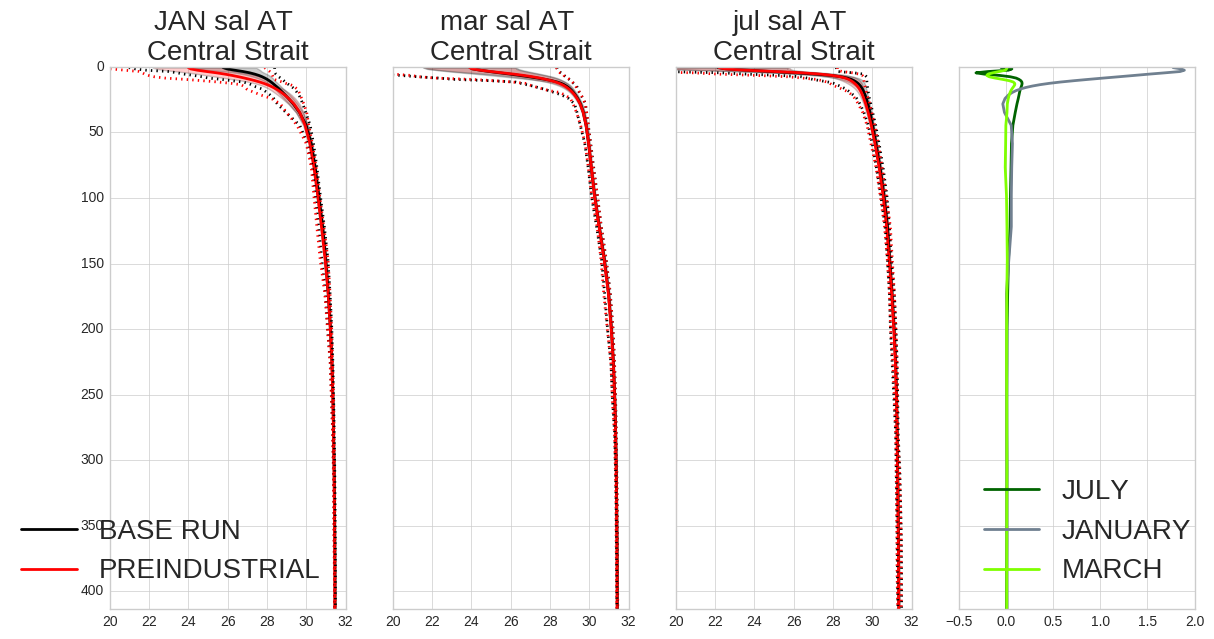

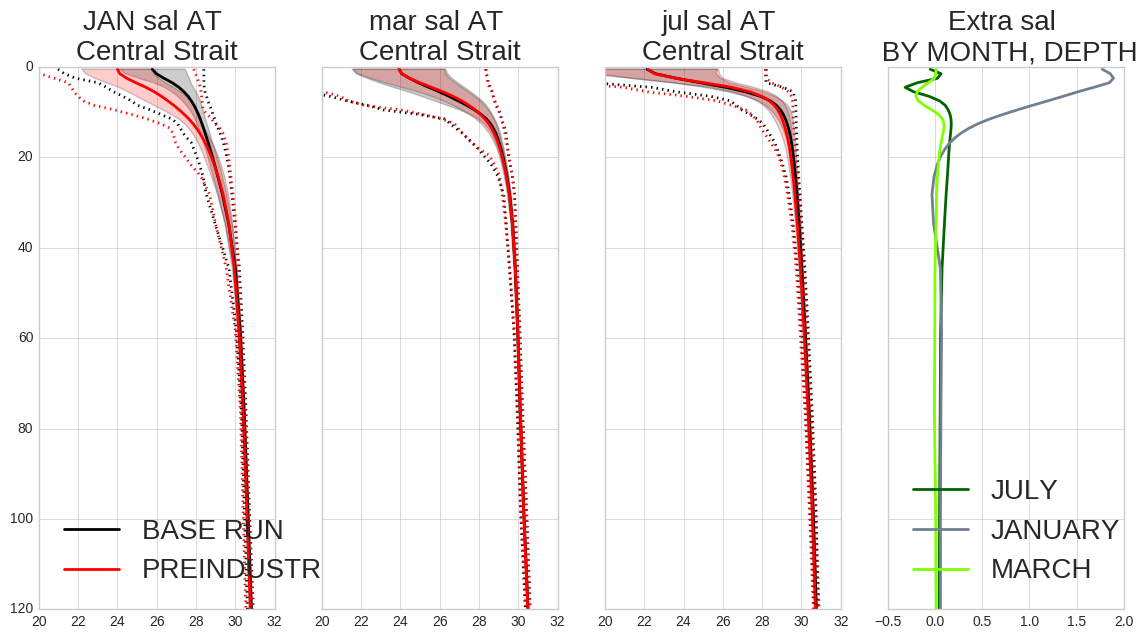